In [22]:
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from datetime import datetime
import sweetviz as sv
import pandas as pd
import numpy as np
from tqdm import tqdm
import nltk
import os
import json
import re
lemmatizer = WordNetLemmatizer()
pd.get_option("display.max_rows")
pd.get_option("display.max_columns")
nltk.download('omw-1.4')

  Using cached pandas-1.4.3-cp38-cp38-macosx_10_9_x86_64.whl (11.4 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.1
    Uninstalling pandas-1.1.1:
      Successfully uninstalled pandas-1.1.1
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3 -m pip install --upgrade pip' command.


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/jaspreetsingh/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [29]:
data = pd.read_csv("intermediates/all_data_vectors.csv")
data = data.fillna(0)
data.drop(columns=['post_id'], inplace=True)
data

,ml_interests_,ml_interests_animals,ml_interests_astrology,ml_interests_business,ml_interests_celebrityGossip,ml_interests_cricket,ml_interests_crypto,ml_interests_entertainment,ml_interests_fitness,ml_interests_gaming,...,294,295,296,297,298,299,ml_language_gu,text_language_bn,text_language_gu,text_language_kn
0,0.0,0,0,0,0,0,0,1,0,0,...,-0.946849,-0.567990,1.580841,0.230297,-5.499153,-0.132459,0.0,0.0,0.0,0.0
1,0.0,0,0,0,0,0,0,1,0,0,...,-3.547250,0.431450,-1.543900,-2.706850,-4.126000,0.564284,0.0,0.0,0.0,0.0
2,0.0,0,0,0,0,0,0,1,0,0,...,-1.967782,-0.516995,1.240706,0.909288,-6.042655,-0.779042,0.0,0.0,0.0,0.0
3,0.0,0,0,0,0,0,0,1,0,0,...,0.157478,-0.648100,-1.649890,0.098550,-4.198375,2.023882,0.0,0.0,0.0,0.0
4,0.0,0,0,0,0,0,0,1,0,0,...,-1.711375,-0.868152,0.376823,-0.084415,-2.976428,2.988217,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13171,0.0,0,1,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
13172,0.0,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
13173,0.0,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
13174,0.0,0,0,0,0,0,0,1,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [32]:
def get_pca_variance(info: pd.DataFrame, K: int = None):
        pca = PCA(n_components=K)
        pca.fit_transform(info)
        #print(pca.explained_variance_)
        #print(sum(pca.explained_variance_))
        #pd.DataFrame(pca.explained_variance_ratio_).plot.bar()
        plt.plot(np.cumsum(pca.explained_variance_ratio_))
        plt.legend('')
        plt.xlabel('#Principal Components')
        plt.ylabel('CumulativeExplained Varience');

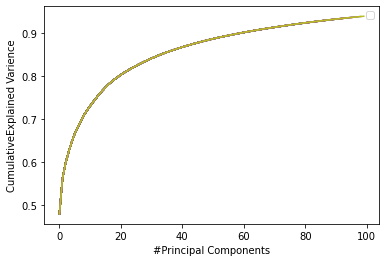

In [33]:
for index in range(2, 101):
    get_pca_variance(data, K=index)